#IS455 Final

### Packages

In [1]:
import pandas as pd
import bqplot
import matplotlib.pyplot as plt
import re
import ipywidgets
from ipywidgets import interact, widgets
import plotly.express as px
import geopandas as gpd

In [2]:
from google.colab import output
output.disable_custom_widget_manager()

### Reading Data

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/jimmystereo/building_visualization/main/global_power_plant_database.csv")
df

<ipython-input-3-5052f008b94b>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://raw.githubusercontent.com/jimmystereo/building_visualization/main/global_power_plant_database.csv")


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.3220,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.6700,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.6230,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.5560,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.6410,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,ZMB,Zambia,Ndola,WRI1022386,50.0,-12.9667,28.6333,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,183.79,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34932,ZMB,Zambia,Nkana,WRI1022384,20.0,-12.8167,28.2000,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,73.51,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34933,ZMB,Zambia,Victoria Falls,WRI1022380,108.0,-17.9167,25.8500,Hydro,NaN,NaN,...,575.78,575.78,548.94,579.90,578.32,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
34934,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.0,-18.3835,26.4700,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,2785.10,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


## Visualizations

### Line Plots

##### Data Processing

In [4]:
df_USA = df[['country', 'name', 'capacity_mw',
             'latitude', 'longitude', 'primary_fuel', 'year_of_capacity_data',
             'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
             'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
             'generation_gwh_2019', 'generation_data_source',
             'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
             'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
             'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
             'estimated_generation_note_2014', 'estimated_generation_note_2015',
             'estimated_generation_note_2016', 'estimated_generation_note_2017']].dropna()
df_t = pd.melt(df_USA, id_vars=['country', 'name', 'capacity_mw',
                               'latitude', 'longitude', 'primary_fuel'], value_vars=['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
                                                 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
                                                 'generation_gwh_2019',],var_name='year', value_name='generation')
df_t['year'] = df_t['year'].apply(lambda x: str(int(re.findall('\d+', x)[0])))

df_t2 = pd.melt(df_USA, value_vars=['estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
                                                                                        'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
                                                                                        'estimated_generation_gwh_2017'],var_name='year', value_name='est_generation')
df_t2['year'] = df_t['year'].apply(lambda x: str(int(re.findall('\d+', x)[0])))
df_t3 = df_t.merge(df_t2, on = 'year', how = 'inner')

year_mean = df_t3.groupby(['year'])[['generation', 'est_generation']].mean().reset_index().rename(columns = {'generation':'avg_generation', "est_generation": 'avg_est_generation'})
year_max = df_t3.groupby(['year'])[['generation', 'est_generation']].max().reset_index().rename(columns = {'generation':'max_generation', "est_generation": 'max_est_generation'})

def construct_target_plant(column, name):
    df_USA_i = df_USA[df_USA[column] == name]
    df_t = pd.melt(df_USA_i, id_vars=['country', 'name', 'capacity_mw',
                               'latitude', 'longitude', 'primary_fuel'], value_vars=['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
                                                 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
                                                 'generation_gwh_2019',],var_name='year', value_name='generation')
    df_t['year'] = df_t['year'].apply(lambda x: str(int(re.findall('\d+', x)[0])))

    df_t2 = pd.melt(df_USA_i, value_vars=['estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
                                                                                            'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
                                                                                            'estimated_generation_gwh_2017'],var_name='year', value_name='est_generation')
    df_t2['year'] = df_t['year'].apply(lambda x: str(int(re.findall('\d+', x)[0])))
    df_t3 = df_t.merge(df_t2, on = 'year', how = 'inner')
    df_t3 = df_t3.merge(year_mean, on = 'year', how = 'inner')
    df_t3 = df_t3.merge(year_max, on = 'year', how = 'inner')

    return df_t3

local_store = {}
for Power in df_USA['primary_fuel'].unique():
  df4 = construct_target_plant('primary_fuel', Power)
  df4 = df4.groupby('year')[["generation", "est_generation", "avg_generation", "avg_est_generation", "max_generation", "max_est_generation"]].mean().reset_index()
  local_store[Power] = df4

##### Showing

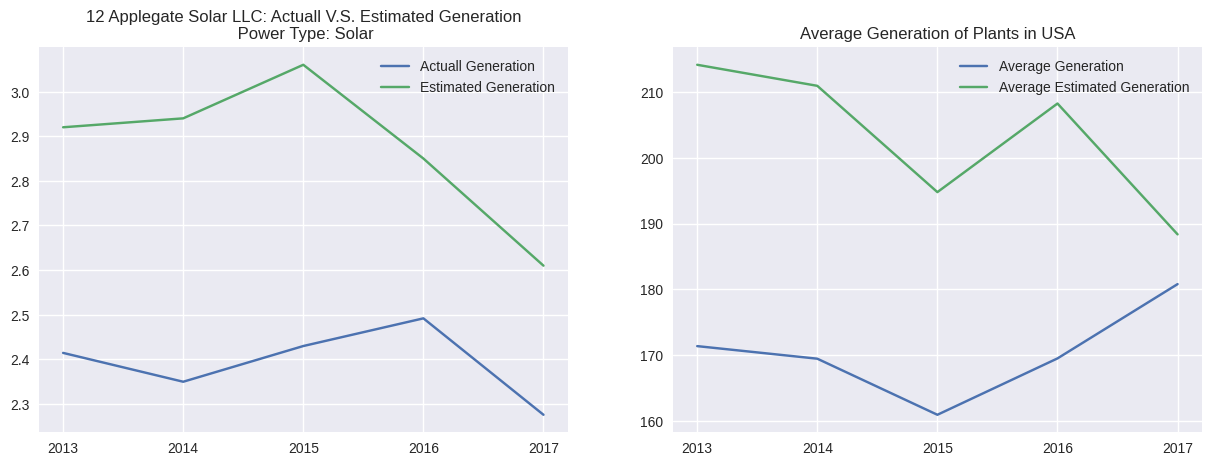

In [5]:
@ipywidgets.interact(Power = df_USA['primary_fuel'].unique())
def make_plot(Power):
    with plt.style.context('seaborn'):
      df4 = local_store[Power]


      # print(power_type)

      fig, ax = plt.subplots(1,2, figsize=(15, 5))
      line1 = ax[0].plot(df4['year'], df4['generation'], label = 'Actuall Generation')
      line2 = ax[0].plot(df4['year'], df4['est_generation'], label = 'Estimated Generation')
      # line3 = ax[0].plot(df4['year'], df4['avg_generation'], label = 'Average Generation')

      ax[0].legend()
      ax[0].set_title(f'{Power}\n Actuall V.S. Estimated Generation')

      line3 = ax[1].plot(df4['year'], df4['max_generation'], label = 'Max Generation')
      line4 = ax[1].plot(df4['year'], df4['max_est_generation'], label = 'Max Estimated Generation')
      ax[1].legend()

      ax[1].set_title(f'Maximum Generation of Plants in USA')

      plt.show()

@ipywidgets.interact(name = df_USA['name'].unique())
def make_plot(name):
    with plt.style.context('seaborn'):
        if name in local_store:
          df4 = local_store[name]
        else:
          df4 = construct_target_plant('name', name)
          local_store[name] = df4
        power_type = df4.loc[0,'primary_fuel']
        # print(power_type)

        fig, ax = plt.subplots(1,2, figsize=(15, 5))
        line1 = ax[0].plot(df4['year'], df4['generation'], label = 'Actuall Generation')
        line2 = ax[0].plot(df4['year'], df4['est_generation'], label = 'Estimated Generation')
        # line3 = ax[0].plot(df4['year'], df4['avg_generation'], label = 'Average Generation')

        ax[0].legend()
        ax[0].set_title(f'{name}: Actuall V.S. Estimated Generation\n Power Type: {power_type}')

        line3 = ax[1].plot(df4['year'], df4['avg_generation'], label = 'Average Generation')
        line4 = ax[1].plot(df4['year'], df4['avg_est_generation'], label = 'Average Estimated Generation')
        ax[1].legend()

        ax[1].set_title(f'Average Generation of Plants in USA')

        plt.show()


### Scatter Plot

In [6]:
df_filtered = df.dropna(subset=['commissioning_year'])
country_options = ['All'] + df_filtered['country_long'].unique().tolist()

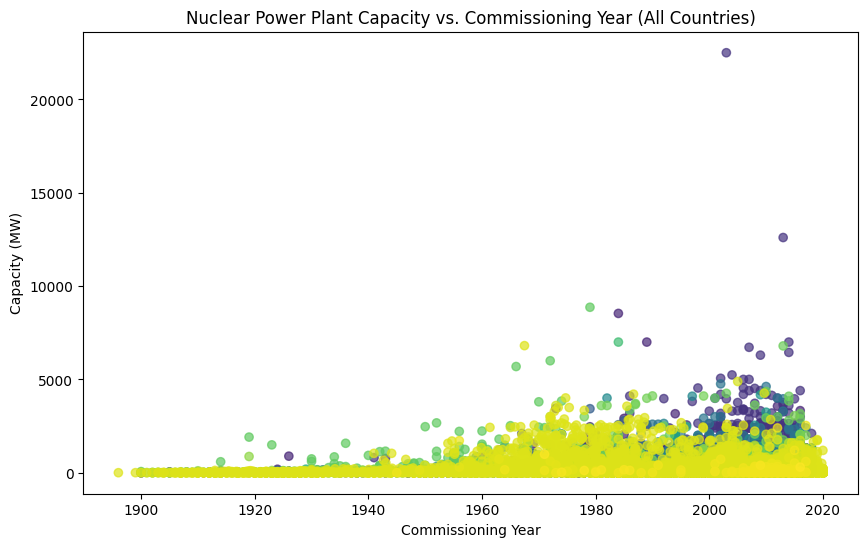

In [7]:
def update_plot(selected_country='All'):
    plt.figure(figsize=(10, 6))

    if selected_country == 'All':
        # Plot for all countries
        plt.scatter(df_filtered['commissioning_year'], df_filtered['capacity_mw'], c=df_filtered['country_long'].astype('category').cat.codes, cmap='viridis', alpha=0.7)
        plt.title('Nuclear Power Plant Capacity vs. Commissioning Year (All Countries)')
    else:
        # Plot for the selected country
        selected_data = df_filtered[df_filtered['country_long'] == selected_country]
        plt.scatter(selected_data['commissioning_year'], selected_data['capacity_mw'], color='blue', alpha=0.7)
        plt.title(f'Nuclear Power Plant Capacity vs. Commissioning Year ({selected_country})')

    plt.xlabel('Commissioning Year')
    plt.ylabel('Capacity (MW)')
    plt.show()

# Use the interact function to create a dropdown widget
interact(update_plot, selected_country=widgets.Dropdown(options=country_options, value='All'));

### Bar Chart

In [8]:
from google.colab import output
output.enable_custom_widget_manager()
def get_country_counts(top_n, min_plants):
    country_counts = df['country_long'].value_counts().reset_index()
    country_counts.columns = ['Country', 'Number of Power Plants']
    filtered_counts = country_counts[country_counts['Number of Power Plants'] >= min_plants]
    return filtered_counts.head(top_n)


x_sc = bqplot.OrdinalScale()
y_sc = bqplot.LinearScale()


x_ax = bqplot.Axis(scale=x_sc, label='Country', tick_rotate=-14, label_offset='40px')
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical', label='Number of Power Plants', label_offset='50px')
x_ax.tick_style = {'font-size': 10}


initial_data = get_country_counts(15, 100)
bar = bqplot.Bars(x=initial_data['Country'],
                  y=initial_data['Number of Power Plants'],
                  scales={'x': x_sc, 'y': y_sc},

                  display_legend=False)


tooltip = bqplot.Tooltip(fields=['x', 'y'], formats=['', '.0f'], labels=['Country', 'Number of Power Plants'])
bar.tooltip = tooltip


fig = bqplot.Figure(marks=[bar], axes=[x_ax, y_ax], title='Number of Power Plants per Country')
fig.layout.height = '500px'
fig.layout.width = '1000px'


dropdown_top_n = widgets.Dropdown(options=[10, 15, 20, 25, 30], value=15, description='Countries')


dropdown_min_plants = widgets.Dropdown(options=[1000, 500, 300, 200, 100], value=100, description='Plants >')


def update_bar(change):
    new_data = get_country_counts(dropdown_top_n.value, dropdown_min_plants.value)
    bar.x = new_data['Country']
    bar.y = new_data['Number of Power Plants']


dropdown_top_n.observe(update_bar, names='value')
dropdown_min_plants.observe(update_bar, names='value')


widgets.VBox([dropdown_top_n, dropdown_min_plants, fig])

### Pie Chart

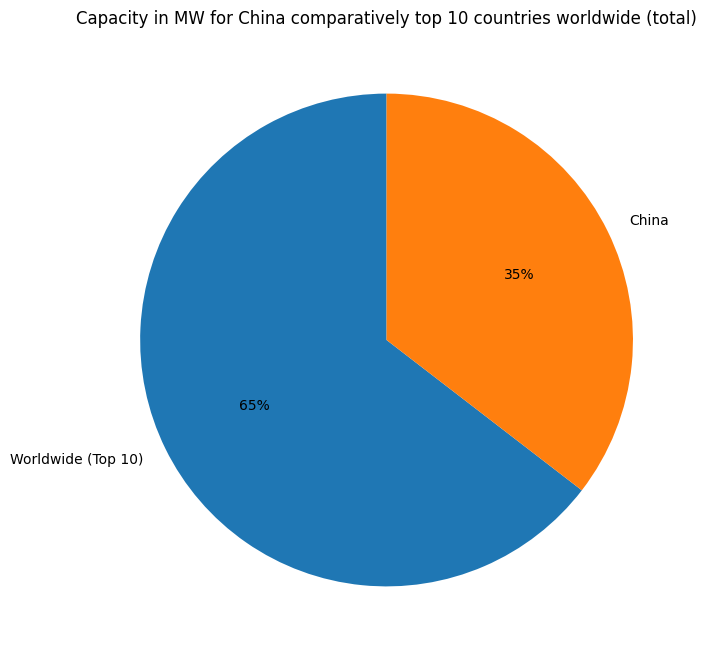

In [9]:
top_10 = df2 = df.groupby('country_long')['capacity_mw'].sum().to_frame().reset_index().sort_values(by = 'capacity_mw', ascending = False).head(10)
options = list(df2['country_long'])
@ipywidgets.interact(country = options)
def make_pie_chart(country):
    top10_countries_total = df2[df2['country_long'] != country]['capacity_mw'].sum() #calculate the sum of all capacity_mw except for the selected country
    selected_country_cap = df2[df2['country_long'] == country]['capacity_mw'].values[0] #calculate the capacity_mw of the selected country
    proportions = [top10_countries_total, selected_country_cap,]

    plt.figure(figsize = (16,8))
    plt.pie(proportions,  labels = ['Worldwide (Top 10)', country],  autopct='%1.0f%%', startangle = 90)
    plt.title(f'Capacity in MW for {country} comparatively top 10 countries worldwide (total)')

    plt.show()

### Map

<ipython-input-22-f20e85ff69da>:6: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



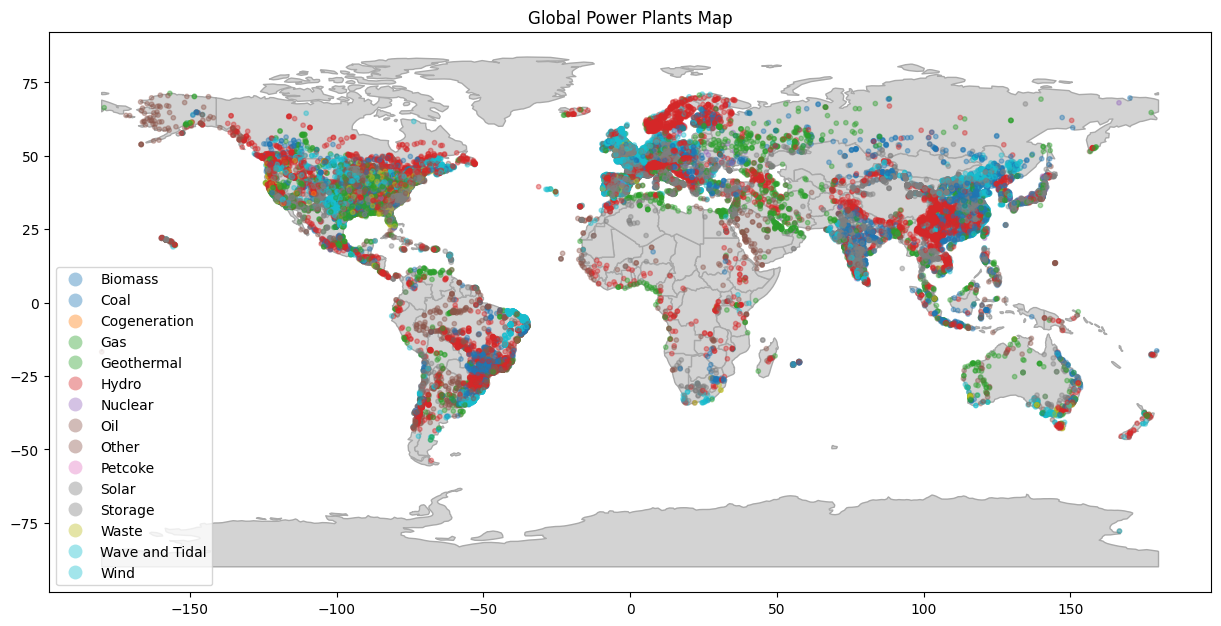

In [ ]:
# World Map Using Matplotlib and GeoPandas

geometry = gpd.points_from_xy(df['longitude'], df['latitude'])
gdf = gpd.GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world.plot(figsize=(15, 10), color='lightgrey', edgecolor='darkgrey')

gdf.plot(ax=ax, column='primary_fuel', legend=True, markersize=10, alpha=0.4)

plt.title('Global Power Plants Map')

plt.show()


<ipython-input-23-45ca902ee147>:8: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



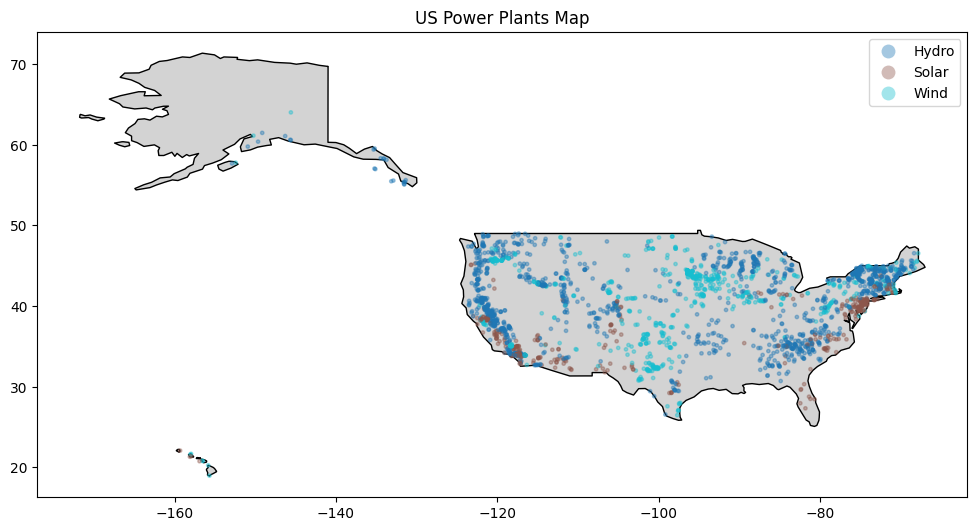

In [ ]:
# US Map Using Matplotlib and Geopandas

df_USA = df_USA[df_USA['longitude'] <= 100]

geometry = gpd.points_from_xy(df_USA['longitude'], df_USA['latitude'])
gdf_us = gpd.GeoDataFrame(df_USA, geometry=geometry)

us = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us = us[us['iso_a3'] == 'USA']  # Select only the US

ax = us.plot(figsize=(12, 10), color='lightgrey', edgecolor='black')

gdf_us.plot(ax=ax, column='primary_fuel', legend=True, markersize=6, alpha=0.4)

plt.title('US Power Plants Map')

plt.show()

In [ ]:
# World Map Using Plotly - Interactive

fig = px.scatter_mapbox(df,
                        lat="latitude",
                        lon="longitude",
                        hover_name="name",
                        hover_data=["name", "capacity_mw", "primary_fuel"],
                        color="primary_fuel",
                        size="capacity_mw",
                        opacity=0.6,
                        zoom=2,
                        height=1200,
                        width=1200)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()